## 0 创建文件夹

In [6]:
!mkdir source/
!mkdir source/pred/
# !mkdir source/pred_0730_solution16_31000_enlage_ORC_Aunk_B
# !mkdir source/pred_0730_solution15_31000_enlage_dv3p_Aunk_B
# !mkdir source/pred_0730_solution16_17500_Aunk_B
# !mkdir source/0803_solution17_57500_Aunk_B
!mkdir source/pred_0804_solution18_37600_Aunk_B
# !mkdir source/0804_solution19_60000_Aunk_B
!mkdir target/
!mkdir target/pred/
!mkdir target/test/

## 1 解压图片

In [7]:
# 解压原图片集
# !unzip -oq pred_0730_solution16_31000_enlage_ORC_Aunk_B.zip -d source/
# !unzip -oq pred_0730_solution15_31000_enlage_dv3p_Aunk_B.zip -d source/
# !unzip -oq pred_0730_solution16_17500_Aunk_B.zip -d source/
# !unzip -oq 0803_solution17_57500_Aunk_B.zip -d source/0803_solution17_57500_Aunk_B
!unzip -oq pred_0804_solution18_37600_Aunk_B.zip -d source/
# !unzip -oq 0804_solution19_60000_Aunk_B.zip -d source/0804_solution19_60000_Aunk_B

## 3 导入对应的库

In [8]:
import os
from PIL import Image
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
import random
import cv2

## 4 进行图片检查

In [9]:
# image_file_path1 = "pred_0730_solution16_31000_enlage_ORC_Aunk_B"
# image_file_path2 = "pred_0730_solution15_31000_enlage_dv3p_Aunk_B"
# image_file_path3 = "pred_0730_solution16_17500_Aunk_B"
# image_file_path4 = "0803_solution17_57500_Aunk_B"
image_file_path5 = "pred_0804_solution18_37600_Aunk_B"
# image_file_path6 = "0804_solution19_60000_Aunk_B"

def check_image_num(temp_path): # 首先检查一下共有多少个图片
    image_file_path = "source/" + temp_path
    file_names = os.listdir(image_file_path)
    file_names = sorted(file_names)
    print(len(file_names))
    print(file_names[0])
    print(file_names[1])
    print(os.path.join(image_file_path, file_names[0]) )
    print(os.path.join(image_file_path, file_names[1]) )
    # 去除非图片文件
    for index, fn in enumerate(file_names):
        if '.png' not in fn:
            del(file_names[index])

    print(len(file_names))
    print(file_names[0])
    print(file_names[1])
    print(os.path.join(image_file_path, file_names[0]) )
    print(os.path.join(image_file_path, file_names[1]) )
    print("##############################")
    return file_names

# file_names1 = check_image_num(image_file_path1)
# file_names2 = check_image_num(image_file_path2)
# file_names3 = check_image_num(image_file_path3)
# file_names4 = check_image_num(image_file_path4)
file_names5 = check_image_num(image_file_path5)
# file_names6 = check_image_num(image_file_path6)

10989
ILSVRC2012_val_00000007.png
ILSVRC2012_val_00000012.png
source/pred_0804_solution18_37600_Aunk_B/ILSVRC2012_val_00000007.png
source/pred_0804_solution18_37600_Aunk_B/ILSVRC2012_val_00000012.png
10989
ILSVRC2012_val_00000007.png
ILSVRC2012_val_00000012.png
source/pred_0804_solution18_37600_Aunk_B/ILSVRC2012_val_00000007.png
source/pred_0804_solution18_37600_Aunk_B/ILSVRC2012_val_00000012.png
##############################


In [10]:
# 显示图片函数
def show_image(image_1):
    lena = mpimg.imread(image_1,0) 
    plt.imshow(lena) # 显示图片
    plt.axis('off') # 不显示坐标轴
    plt.show()

In [11]:
# 查看图片及数值
def check_values(standard_label):
    # 展示图片
    show_image(standard_label)

    #读取一张图片，并显示其对应像素的通道数值
    img=Image.open(standard_label) 
    img_array=img.load()
    print(img.size) # 图片大小
    print(img_array[0,0]) # [0,0]位置的通道数值

    # 检查该图片除了(0,0,0)以外是否有其他通道数值
    values = []
    for i in range(img.size[0]):
        for j in range(img.size[1]):
                if img_array[i,j] not in values:
                    values.append(img_array[i,j])

    print("For the figure " + standard_label +" , there are " + str(len(values)) + " kinds of different values")
    print(values)

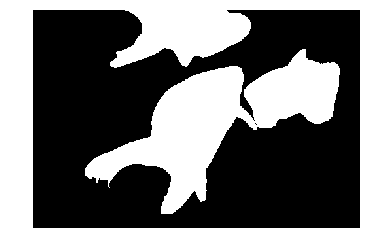

(500, 333)
(0, 0, 0)
For the figure n01443537_12860.png , there are 2 kinds of different values
[(0, 0, 0), (255, 255, 255)]


In [12]:
standard_label = 'n01443537_12860.png'
check_values(standard_label)

## 5 压缩函数

In [13]:
# 将结果压缩到pred.zip中
import zipfile

def zipDir(dirpath,outFullName):
    zip = zipfile.ZipFile(outFullName,"w",zipfile.ZIP_DEFLATED)
    for path,dirnames,filenames in os.walk(dirpath):
        # 去掉目标跟路径，只对目标文件夹下边的文件及文件夹进行压缩
        fpath = path.replace(dirpath,'')

        for filename in filenames:
            zip.write(os.path.join(path,filename),os.path.join(fpath,filename))
    zip.close()


## 6 以训练集中的标签形式进行黑白色的对比度增强

In [14]:
def access_pixels(filename, img):
    """遍历图像每个像素的每个通道"""
    #print(img.shape)              #打印图像的高，宽，通道数（返回一个3元素的tuple）
    height = img.shape[0]        #将tuple中的元素取出，赋值给height，width，channels
    width = img.shape[1]
    channels = img.shape[2]
    #print("height:%s,width:%s,channels:%s" % (height,width,channels))
    #print(img.size)              #打印图像数组内总的元素数目（总数=高X宽X通道数）
    #values = []
    #print(img[0][0])
    for row in range(height):    #遍历每一行
        for col in range(width): #遍历每一列
            # if str(img[row][col]) not in values:
            #     values.append(str(img[row][col]))
            if img[row][col][0] == 0 and img[row][col][1] == 0 and img[row][col][2] == 128:
                img[row][col][0] = 0
                img[row][col][1] = 0
                img[row][col][2] = 0
            else:
                img[row][col][0] = 255
                img[row][col][1] = 255
                img[row][col][2] = 255
    #         # for channel in range(channels):    #遍历每个通道（三个通道分别是BGR）
    #         if img[row][col] not in values:
    #             values.append(img[row][col])
    #             print(img[row][col])
    #             # if img[row][col][channel] != 0:
    #             #     img[row][col][channel] = 255
    #             # #通过数组索引访问该元素，并作出处理
    cv2.imwrite(filename, img)
    # print(len(values))
    # print(values)


In [15]:
# 处理一张
source_file_path = os.path.join("source/" + image_file_path5, file_names5[1])
target_file_path = os.path.join('target/test', file_names5[1][:-3]+'jpg' )
print(source_file_path)
print(target_file_path)
src = cv2.imread(source_file_path)  #读取图像
access_pixels(target_file_path, src)         #访问图像的每个元素并处理


source/pred_0804_solution18_37600_Aunk_B/ILSVRC2012_val_00000012.png
target/test/ILSVRC2012_val_00000012.jpg


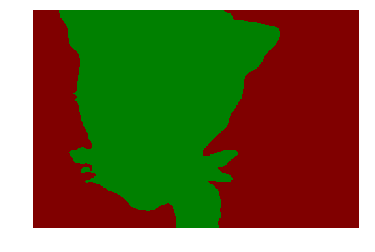

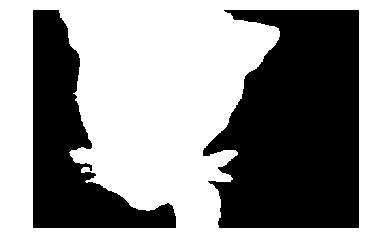

In [16]:
show_image(source_file_path)
show_image(target_file_path)

In [17]:
# !mkdir target/pred_0730_solution16_31000_enlage_ORC_Aunk_B/
# !mkdir target/pred_0730_solution15_31000_enlage_dv3p_Aunk_B/
# !mkdir target/pred_0730_solution16_17500_Aunk_B/
# !mkdir target/0803_solution17_57500_Aunk_B/
!mkdir target/pred_0804_solution18_37600_Aunk_B/
# !mkdir target/0804_solution19_60000_Aunk_B/

#转换所有图片
def make_zero_one(file_names,temp_path):
    image_file_path_source = 'source/' + temp_path
    image_file_path_target = 'target/' + temp_path
    for index, fn in enumerate(file_names):
        source_file_path = os.path.join(image_file_path_source, file_names[index])
        target_file_path = os.path.join(image_file_path_target, file_names[index])
        src = cv2.imread(source_file_path)  #读取图像
        access_pixels(target_file_path, src)         #访问图像的每个元素并处理
        if index % 100 == 0:
            print("progress: {:.2%}".format(index/len(file_names)))


# make_zero_one(file_names1,image_file_path1)
# make_zero_one(file_names2,image_file_path2)
# make_zero_one(file_names3,image_file_path3)
# make_zero_one(file_names4,image_file_path4)
make_zero_one(file_names5,image_file_path5)
# make_zero_one(file_names6,image_file_path6)

progress: 0.00%
progress: 0.91%
progress: 1.82%
progress: 2.73%
progress: 3.64%
progress: 4.55%
progress: 5.46%
progress: 6.37%
progress: 7.28%
progress: 8.19%
progress: 9.10%
progress: 10.01%
progress: 10.92%
progress: 11.83%
progress: 12.74%
progress: 13.65%
progress: 14.56%
progress: 15.47%
progress: 16.38%
progress: 17.29%
progress: 18.20%
progress: 19.11%
progress: 20.02%
progress: 20.93%
progress: 21.84%
progress: 22.75%
progress: 23.66%
progress: 24.57%
progress: 25.48%
progress: 26.39%
progress: 27.30%
progress: 28.21%
progress: 29.12%
progress: 30.03%
progress: 30.94%
progress: 31.85%
progress: 32.76%
progress: 33.67%
progress: 34.58%
progress: 35.49%
progress: 36.40%
progress: 37.31%
progress: 38.22%
progress: 39.13%
progress: 40.04%
progress: 40.95%
progress: 41.86%
progress: 42.77%
progress: 43.68%
progress: 44.59%
progress: 45.50%
progress: 46.41%
progress: 47.32%
progress: 48.23%
progress: 49.14%
progress: 50.05%
progress: 50.96%
progress: 51.87%
progress: 52.78%
progress

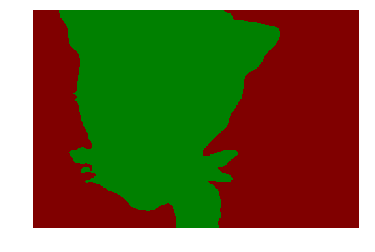

(500, 334)
0
For the figure source/pred_0804_solution18_37600_Aunk_B/ILSVRC2012_val_00000012.png , there are 2 kinds of different values
[0, 1]


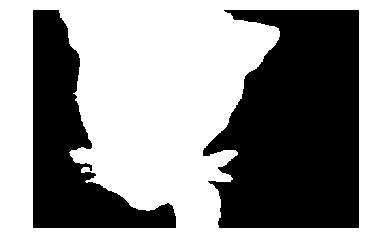

(500, 334)
(0, 0, 0)
For the figure target/test/ILSVRC2012_val_00000012.jpg , there are 16 kinds of different values
[(0, 0, 0), (255, 255, 255), (252, 252, 252), (1, 1, 1), (4, 4, 4), (254, 254, 254), (253, 253, 253), (2, 2, 2), (3, 3, 3), (251, 251, 251), (5, 5, 5), (6, 6, 6), (249, 249, 249), (7, 7, 7), (250, 250, 250), (248, 248, 248)]


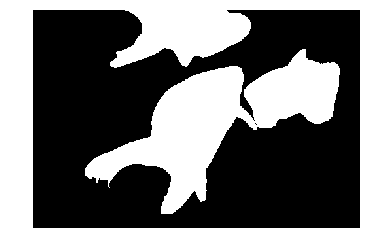

(500, 333)
(0, 0, 0)
For the figure n01443537_12860.png , there are 2 kinds of different values
[(0, 0, 0), (255, 255, 255)]


In [18]:
check_values(source_file_path)
check_values(target_file_path)
check_values(standard_label)

### 压缩图片

In [19]:
import shutil

def make_jpg(s_filepath, t_filepath):
    shutil.copytree(s_filepath,t_filepath)
    fileList = os.listdir(s_filepath)
    print(os.sep)
    print(len(fileList))
    for fn in fileList:
        oldname = t_filepath + os.sep + fn
        newname = t_filepath + os.sep + fn[:-4] + '.jpg'
        os.rename(oldname,newname)

# make_jpg('target/'+image_file_path1, 'target/'+image_file_path1+'_jpg')
# make_jpg('target/'+image_file_path2, 'target/'+image_file_path2+'_jpg')
# make_jpg('target/'+image_file_path3, 'target/'+image_file_path3+'_jpg')
# make_jpg('target/'+image_file_path4, 'target/'+image_file_path4+'_jpg')
make_jpg('target/'+image_file_path5, 'target/'+image_file_path5+'_jpg')
# make_jpg('target/'+image_file_path6, 'target/'+image_file_path6+'_jpg')

/
10989


In [20]:

# zipDir('target/'+image_file_path1+'_jpg', image_file_path1+'_jpg.zip')
# zipDir('target/'+image_file_path2+'_jpg', image_file_path2+'_jpg.zip')
# zipDir('target/'+image_file_path3+'_jpg', image_file_path3+'_jpg.zip')
# zipDir('target/'+image_file_path4+'_jpg', image_file_path4+'_jpg.zip')
zipDir('target/'+image_file_path5+'_jpg', image_file_path5+'_jpg.zip')
# zipDir('target/'+image_file_path6+'_jpg', image_file_path6+'_jpg.zip')